In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline


In [5]:
df = pd.read_csv('master-iri.csv')
df.drop(['Section'], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')

df.to_csv('13-iri-cleaned.csv',index=False)
df = pd.read_csv('13-iri-cleaned.csv')


any nan = False
all finite = True


In [6]:
# Take a quick look at the dataset
df.head()

ACLM    ACH   LTLM    LTH  PLM   PH    BH   PaLM  PaH   RuLM    RuH    DBL  \
0  0.00  0.000  0.087  0.000  0.0  0.0  0.00  0.000  0.0  0.000  0.000  0.110   
1  0.00  0.633  0.523  0.000  0.0  0.0  0.30  0.000  0.0  0.000  0.000  0.109   
2  0.66  0.000  0.000  0.000  0.0  0.0  0.32  0.839  0.0  0.164  0.719  0.676   
3  0.25  0.000  1.298  0.722  0.0  0.0  0.15  0.000  0.0  0.000  0.000  0.469   
4  0.00  0.880  0.000  0.000  0.0  0.0  0.55  0.719  0.0  0.087  0.000  0.258   

     DBH  RoadRoidIRI  
0  0.150        3.120  
1  0.000        3.110  
2  0.000        2.154  
3  0.131        2.980  
4  0.000        3.651

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACLM         524 non-null    float64
 1   ACH          524 non-null    float64
 2   LTLM         524 non-null    float64
 3   LTH          524 non-null    float64
 4   PLM          524 non-null    float64
 5   PH           524 non-null    float64
 6   BH           524 non-null    float64
 7   PaLM         524 non-null    float64
 8   PaH          524 non-null    float64
 9   RuLM         524 non-null    float64
 10  RuH          524 non-null    float64
 11  DBL          524 non-null    float64
 12  DBH          524 non-null    float64
 13  RoadRoidIRI  524 non-null    float64
dtypes: float64(14)
memory usage: 57.4 KB


In [8]:
df.describe()

ACLM         ACH        LTLM         LTH         PLM          PH  \
count  524.000000  524.000000  524.000000  524.000000  524.000000  524.000000   
mean     0.328355    0.202882    0.718385    0.444086    0.060574    0.030370   
std      0.599940    0.416462    0.796395    0.840937    0.161655    0.105779   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.055000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.512000    0.164000    0.000000    0.000000   
75%      0.520000    0.235500    1.075750    0.654000    0.044000    0.000000   
max      7.650000    2.802000    4.709000   13.625000    1.566000    1.091000   

               BH        PaLM         PaH        RuLM         RuH         DBL  \
count  524.000000  524.000000  524.000000  524.000000  524.000000  524.000000   
mean     0.482218    0.221414    0.112050    0.116935    0.105714    0.456973   
std      0.724596    0.520381    0.331823    0.258769    0.333668    0.536155   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.162000    0.000000    0.000000    0.000000    0.000000    0.327000   
75%      0.660000    0.166500    0.000000    0.120000    0.000000    0.681000   
max      4.920000    3.488000    3.357000    1.766000    4.534000    4.469000   

              DBH  RoadRoidIRI  
count  524.000000   524.000000  
mean     0.211076     4.039466  
std      0.373280     1.889531  
min      0.000000     1.254000  
25%      0.000000     2.744750  
50%      0.000000     3.437500  
75%      0.251000     4.668000  
max      3.488000    13.779000

#### Creation of Linear Regression Objects

In [9]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['RoadRoidIRI'],axis=1)

# Choose the response variable 'y' 
y = df.RoadRoidIRI



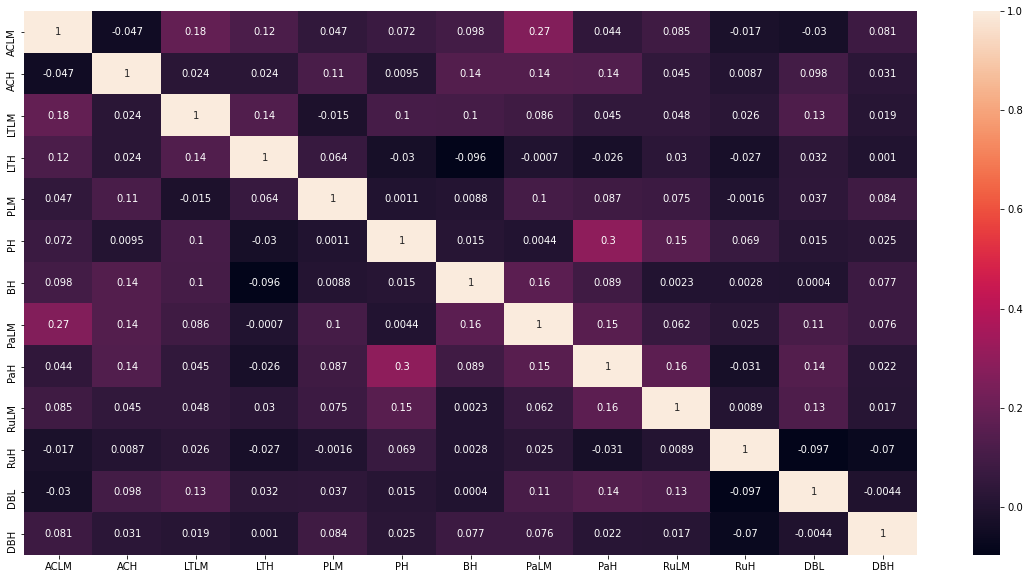

In [10]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [78]:

# sns.pairplot(X)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=1)

In [80]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [81]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=1)

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)

print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")
# old
# test_r2 = 0.5156554784644096
# train_r2 = 0.5414078141853652

#old2 
# test_r2 = 0.5511890243343913
# train_r2 = 0.5343939208425568

test_r2 = 0.835536983477833
train_r2 = 0.709028452864187


In [82]:
table_actual_predicted = X_test.copy(deep=True)
table_actual_predicted['y_predicted'] = multi_linear.predict(X_test)
table_actual_predicted['y_true'] = y_test
table_actual_predicted.to_csv("18_testing_output_linear.csv",index=False )

#### Printing the individual $\beta$ values

In [83]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")



Coefficients: [0.35195233 1.06042875 0.07160903 0.45699975 3.78302342 9.97356271
 0.33670371 0.10491241 0.56685322 0.21269579 0.49271407 0.23278275
 0.4567324 ]
Intercept: 2.398192432380626


line: y = 0.5430085393309253 * x + 1.7387201177858418


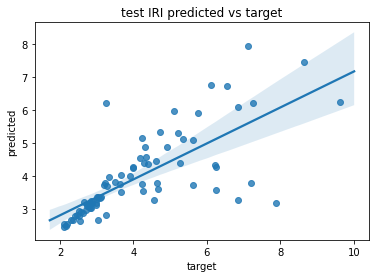

In [91]:

y_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=y_test, y=y_test_prediction)
ax.set(title = 'test IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

line: y = 0.7090284528641871 * x + 1.1810806918796226


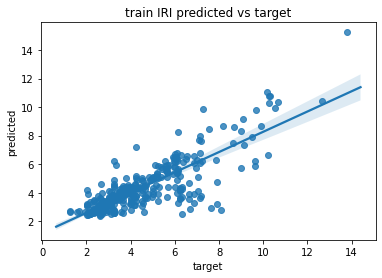

In [85]:
y_train_prediction = multi_linear.predict(X_train)
ax = sns.regplot(x=y_train, y= y_train_prediction)
ax.set(title = 'train IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

Text(0.5, 1.0, 'Residual plot')

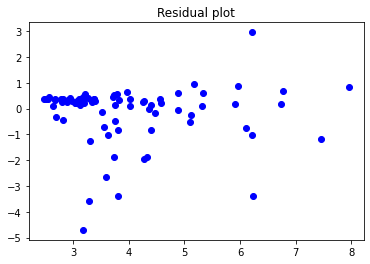

In [94]:
x_plot = plt.scatter(y_test_prediction, (y_test_prediction - y_test), c='b')
# plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

In [87]:
# Now using the stat

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=7)

# Assuming you have your data stored in X and y
# X should be a 2-dimensional array (or DataFrame) containing your features
# y should be a 1-dimensional array (or Series) containing your target

# Fit the linear regression model using sklearn
# sklearn_model = LinearRegression()
# sklearn_model.fit(X, y)

# Add a constant term to the features (intercept) for statsmodels
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
statsmodel = sm.OLS(y_train, X_train_with_constant)
results = statsmodel.fit()

# Access the p-values for each coefficient
p_values = results.pvalues
pd.options.display.float_format = '{:.3f}'.format
greater_than_01 = p_values[p_values.index[p_values > 0.1]]
print(p_values)
print("\n\n p_values greater than 0.01")
print(greater_than_01)
count = greater_than_01.count()

filtered = filter(lambda x: x > 0.1 , p_values)
print((pd.Series(filtered)))
print(p_values)
results.summary()


const   0.000
ACLM    0.000
ACH     0.000
LTLM    0.115
LTH     0.000
PLM     0.000
PH      0.000
BH      0.000
PaLM    0.208
PaH     0.005
RuLM    0.159
RuH     0.002
DBL     0.004
DBH     0.000
dtype: float64


 p_values greater than 0.01
LTLM   0.115
PaLM   0.208
RuLM   0.159
dtype: float64
0   0.115
1   0.208
2   0.159
dtype: float64
const   0.000
ACLM    0.000
ACH     0.000
LTLM    0.115
LTH     0.000
PLM     0.000
PH      0.000
BH      0.000
PaLM    0.208
PaH     0.005
RuLM    0.159
RuH     0.002
DBL     0.004
DBH     0.000
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RoadRoidIRI   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     97.19
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.84e-119
Time:                        10:41:07   Log-Likelihood:                -617.82
No. Observations:                 445   AIC:                             1264.
Df Residuals:                     431   BIC:                             1321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3469      0.090     26.148      0.000       2.171       2.523
ACLM           0.3017      0.083      3.647      0.000       0.139       0.464
ACH            1.0248      0.114      9.008      0.000       0.801       1.248
LTLM           0.0957      0.061      1.578      0.115      -0.024       0.215
LTH            0.4570      0.055      8.339      0.000       0.349       0.565
PLM            3.6207      0.302     11.979      0.000       3.027       4.215
PH            10.3406      0.455     22.743      0.000       9.447      11.234
BH             0.3488      0.066      5.309      0.000       0.220       0.478
PaLM           0.1203      0.095      1.261      0.208      -0.067       0.308
PaH            0.4260      0.149      2.850      0.005       0.132       0.720
RuLM           0.2763      0.196      1.412      0.159      -0.108       0.661
RuH            0.4350      0.141      3.085      0.002       0.158       0.712
DBL            0.2617      0.090      2.901      0.004       0.084       0.439
DBH            0.5351      0.121      4.414      0.000       0.297       0.773
==============================================================================
Omnibus:                      191.354   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              890.100
Skew:                           1.868   Prob(JB):                    5.21e-194
Kurtosis:                       8.835   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
### edTest(test_knn_mse) ###

# Initialize a list of k values to specify the number of neighbors
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

knn_list = range(1,20)
test_error = []
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=1)

# Loop through the k values from the list defined above
for i in knn_list:
    
    # Initialize a kNN model with the current k value
    model = KNeighborsRegressor(i)
    
    # Fit the model on the train data
    model.fit(X_train, y_train)
    
    # Predict using the trained model on the test data
    y_pred = model.predict(X_test)
    
    # Compute the MSE of the test predictions
    mse = mean_squared_error(y_test, y_pred)

    # Append the error to the list initialized above
    test_error.append(mse)

/home/test/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/test/anaconda3/lib/p

In [ ]:

z = pd.DataFrame({'AC1': [ 0.26],
 'AC2': [ 1.2],
 'AC3': [ 0.12],
 'BE1': [ 0.151],
 'BE2': [ 0.0],
 'BE3': [ 0.0],
 'D1': [ 0.0],
 'D2': [ 0.0],
 'D3': [ 0.0],
 'F1': [ 0.0],
 'F2': [ 0.0],
 'F3': [ 0.0],
 'G1': [ 0.0],
 'G2': [ 0.0],
 'G3': [ 0.0],
 'H1': [ 0.0],
 'H2': [ 0.0],
 'H3': [ 0.0]})
z = sm.add_constant(z, has_constant="add")
results.predict((z))

0   3.414
dtype: float64

In [ ]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score


# Ridge Regression

In [11]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_validate



In [13]:

maxdeg = 1
X_poly = PolynomialFeatures(maxdeg, include_bias=False).fit_transform(X)
X_poly = normalize(X_poly, axis=0)
print(X_poly[0])

[0.         0.         0.00354546 0.         0.         0.
 0.         0.         0.         0.         0.         0.00682498
 0.01529183]


In [14]:
alpha_list = np.linspace(0.001,10,1000)
len(alpha_list)


1000

In [16]:
coeff_list = []
r2_score_train_list = []
r2_score_test_list = []
cross_validation_r2 = []
max_r2 = 0
max_r2_cv = 0
max_alpha = 0
max_alpha_cv = 0

# Now, you will implement the ridge regularisation for each alpha value

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, train_size=0.9, random_state=1)

for a in alpha_list:

    ridge_reg = Ridge(alpha=a)

    # Fit on the entire data because we just want to see the trend of the coefficients

    # ridge_reg.fit(X_train, y_train)
    # test_r2 = ridge_reg.score(X_test,y_test)
    # train_r2 = ridge_reg.score(X_train,y_train)
    # r2_score_test_list.append(test_r2)
    # r2_score_train_list.append(train_r2)

    # if test_r2 > max_r2:
    #     max_r2 = test_r2
    #     max_alpha = a

    mse_score = cross_validate(ridge_reg, X_poly, y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)

    # Compute the mean of the cross validation error and store in list 
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function 
    cv_r2 = 1 - (np.mean(-mse_score['test_score'])/ np.var(y))

    cross_validation_r2.append(cv_r2)
    if cv_r2 > max_r2_cv:
        max_r2_cv = cv_r2
        max_alpha_cv = a
    
    
    # Append the coeff_list with the coefficients of the model
    
    coeff_list.append(ridge_reg.coef_)

print(f"max-test-r2:{max(r2_score_test_list)}")
print(f"max-train-r2:{max(r2_score_train_list)}")
print(f"cross-validation-score-r2:{max(cross_validation_r2)}")
print(f"cross-validation-score-r2-calc:{max_r2_cv} at aplha = {max_alpha_cv}")
print(f"max-test-r2:{max_r2} at alpha = {max_alpha}")


/home/test/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in N

/home/test/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in N

max-test-r2:0.7550336265728654
max-train-r2:0.7788486267433782
cross-validation-score-r2:0.5915816618952293
cross-validation-score-r2-calc:0.5915816618952293 at aplha = 0.7716936936936938
max-test-r2:0.7550336265728654 at alpha = 1.0119099099099098


/home/test/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_sam

In [21]:

maxdeg = 1
X_poly = PolynomialFeatures(maxdeg, include_bias=False).fit_transform(X)
X_poly = normalize(X_poly, axis=0)

max_test_r2 = 0
rs_at_max = 0
rs = 1
# for rs in range(200, 1000):
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, train_size=0.9, random_state=rs)

ridge_reg = Ridge(alpha=0.039)

    # Fit on the entire data because we just want to see the trend of the coefficients

ridge_reg.fit(X_train, y_train)
test_r2 = ridge_reg.score(X_test,y_test)
train_r2 = ridge_reg.score(X_train,y_train)
if test_r2 > max_test_r2:
    max_test_r2 = test_r2
    rs_at_max = rs


print(max_test_r2, "at rs =",  rs_at_max)

0.8342309770762437 at rs = 1
